#Capstone Project - The Batle of the Neighborhoods

### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

The aim of this project is to find that neighborhood where the traffic accidents are the most for the installation of more CCTV cameras and more strictness and norms from the traffic department in Toronto, Canada. Specifically, this report will be targeted to the local governing council and the traffic department in Toronto City, Canada.

The first task would be to choose the borough with the most traffic accidents by analysing Traffic accident data for installation of more safety norms and CCTV cameras and short listing a neighbourhood, which is most accident prone, and yet as close to the city as possible.

We will make use of our data science tools to analyse data and focus on the most accident prone borough and explore its neighborhoods and the 10 most common venues in each neighborhood so that the best neighborhood can be selected.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decission are:



1.   finding the borough with the most traffic accidents based on traffic accident reports
2.   finding the most common venues
3.   choosing the right neighbourhood within the borough

Following data sources will be needed to extract/generate the required information:

1. **Data Link**: https://en.wikipedia.org/wiki/ List_of_postal_codes_of_Canada:_M We will use Scarborough dataset which we scrapped from wikipedia on Week 3. Dataset consisting of latitude and longitude, zip codes

2. **Traffic data Link**: https://www.kaggle.com/jrmistry/killed-or-seriously-injured-ksi-toronto-clean This data set is a cleaned version of the Killed or Seriously Injured (KSI) traffic accident reports from the City of Toronto Police Open Data portal.

3. **Foursquare API Data**: We will use "Foursquare" locational information for data about different venues in different neighborhoods of that specific borough.
This data will be used to explore the neighbourhood venues and to apply machine learning algorithm to cluster the neighbourhoods and present the findings by plotting it on maps using Folium.




### Importing all the necessary Libraries

In [ ]:
import numpy as np
import pandas as pd


#visualization 
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

###Reading from the Dataset

In [ ]:
train_data = pd.read_csv("KSI_CLEAN.csv")
df = pd.DataFrame(train_data)
df

,ACCNUM,YEAR,MONTH,DAY,HOUR,MINUTES,WEEKDAY,LATITUDE,LONGITUDE,Ward_Name,Ward_ID,Hood_Name,Hood_ID,Division,District,STREET1,STREET2,OFFSET,ROAD_CLASS,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,FATAL
0,1249781,2011,8,4,23,18,3,43.651545,-79.383490,Toronto Centre-Rosedale (27),27,Bay Street Corridor (76),76,D52,Toronto East York,QUEEN ST W,YORK ST,,Major Arterial,Mid-Block,,No Control,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,Driver,50 to 54,None,0,West,Municipal Transit Bus (TTC),Going Ahead,Driving Properly,Normal,,,,,,,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),40,Tam O'Shanter-Sullivan (118),118,D42,Scarborough,SHEPPARD AVE E,AMETHYST RD,,Major Arterial,Intersection,,No Control,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,Passenger,25 to 29,Minimal,0,,Other,,,,,,,,,,1,0,1,0,0,0,0,1,1,1,0,0,0,0
2,5002235651,2015,12,30,23,39,2,43.682342,-79.328266,Toronto-Danforth (30),30,Greenwood-Coxwell (65),65,D55,Toronto East York,DANFORTH AVE,GILLARD AVE,,Major Arterial,Intersection,At Intersection,No Control,Clear,"Dark, artificial",Dry,Fatal,Pedestrian Collisions,Pedestrian,60 to 64,Fatal,64,South,,,,,Vehicle is going straight thru inter.while ped...,"Crossing, no Traffic Control",Normal,,,,1,0,1,0,0,0,0,0,0,1,0,0,0,1
3,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),40,Tam O'Shanter-Sullivan (118),118,D42,Scarborough,SHEPPARD AVE E,AMETHYST RD,,Major Arterial,Intersection,,No Control,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,Vehicle Owner,unknown,,0,,Other,,,,,,,,,,1,0,1,0,0,0,0,1,1,1,0,0,0,0
4,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),40,Tam O'Shanter-Sullivan (118),118,D42,Scarborough,SHEPPARD AVE E,AMETHYST RD,,Major Arterial,Intersection,,No Control,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,Driver,60 to 64,None,0,West,"Automobile, Station Wagon",Going Ahead,Failed to Yield Right of Way,Normal,,,,,,,1,0,1,0,0,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12552,1291534,2012,3,2,18,12,4,43.663245,-79.367590,Toronto Centre-Rosedale (28),28,Moss Park (73),73,D51,Toronto East York,PARLIAMENT ST,SPRUCE ST,,Minor Arterial,Intersection,,No Control,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,Motorcycle Driver,45 to 49,Major,0,South,Motorcycle,Going Ahead,Lost control,Inattentive,,,,,,,1,0,0,1,0,0,0,0,1,1,0,0,0,0
12553,1291534,2012,3,2,18,12,4,43.663245,-79.367590,Toronto Centre-Rosedale (28),28,Moss Park (73),73,D51,Toronto East York,PARLIAMENT ST,SPRUCE ST,,Minor Arterial,Intersection,,No Control,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,Other,unknown,None,0,South,Other,Parked,,,,,,,,,1,0,0,1,0,0,0,0,1,1,0,0,0,0
12554,1291534,2012,3,2,18,12,4,43.663245,-79.367590,Toronto Centre-Rosedale (28),28,Moss Park (73),73,D51,Toronto East York,PARLIAMENT ST,SPRUCE ST,,Minor Arterial,Intersection,,No Control,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,Pedestrian,30 to 34,Minimal,0,East,Other,,,,Pedestrian hit at mid-block,Walking on Roadway with Traffic,Normal,,,,1,0,0,1,0,0,0,0,1,1,0,0,0,0
12555,6001157650,2016,7,2,18,12,5,43.645874,-79.363430,Toronto Centre-Rosedale (28),28,Waterfront Communities-The Island (77),77,D51,Toronto East York,QUEENS QUAY E,BONNYCASTLE ST,65.6 M E of,Minor Arterial,Mid-Block,Non Intersection,No Control,Clear,Daylight,Dry,Fatal,SMV Other,Passenger,35 to 39,Fatal,45,,,,,,,,,,,,0,0,1,0,0,0,0,1,1,1,0,0,0,1


###Data Cleaning

In [ ]:
#Finding NA values
data.isna().sum()

YEAR_MONTH       0
ACCNUM           0
DAY              0
HOUR             0
MINUTES          0
WEEKDAY          0
LATITUDE         0
LONGITUDE        0
Ward_Name        0
Ward_ID          0
Hood_Name        0
Hood_ID          0
Division         0
District         0
STREET1          0
STREET2          0
OFFSET           0
ROAD_CLASS       0
LOCCOORD         0
ACCLOC           0
TRAFFCTL         0
VISIBILITY       0
LIGHT            0
RDSFCOND         0
ACCLASS          0
IMPACTYPE        0
INVTYPE          0
INVAGE           0
INJURY           0
FATAL_NO         0
INITDIR          0
VEHTYPE          0
MANOEUVER        0
DRIVACT          0
DRIVCOND         0
PEDTYPE          0
PEDACT           0
PEDCOND          0
CYCLISTYPE       0
CYCACT           0
CYCCOND          0
PEDESTRIAN       0
CYCLIST          0
AUTOMOBILE       0
MOTORCYCLE       0
TRUCK            0
TRSN_CITY_VEH    0
EMERG_VEH        0
PASSENGER        0
SPEEDING         0
AG_DRIV          0
REDLIGHT         0
ALCOHOL     

In [ ]:
data['District'].unique()

array(['Toronto East York', 'Scarborough', 'Etobicoke York', 'North York',
       ' ', 'No District'], dtype=object)

In [ ]:
#Keeping the relevant columns
toronto_acc= data[['Ward_Name','District', 'IMPACTYPE', 'YEAR',	'MONTH',	'TIMESTAMP']]
toronto_acc

,Ward_Name,District,IMPACTYPE,YEAR,MONTH,TIMESTAMP
0,Toronto Centre-Rosedale (27),Toronto East York,Pedestrian Collisions,2011,8,2011-08-01 23:18:00
1,Scarborough-Agincourt (40),Scarborough,Pedestrian Collisions,2012,8,2012-08-01 23:18:00
2,Toronto-Danforth (30),Toronto East York,Pedestrian Collisions,2015,12,2015-12-01 23:39:00
3,Scarborough-Agincourt (40),Scarborough,Pedestrian Collisions,2012,8,2012-08-01 23:18:00
4,Scarborough-Agincourt (40),Scarborough,Pedestrian Collisions,2012,8,2012-08-01 23:18:00
...,...,...,...,...,...,...
12552,Toronto Centre-Rosedale (28),Toronto East York,Pedestrian Collisions,2012,3,2012-03-01 18:12:00
12553,Toronto Centre-Rosedale (28),Toronto East York,Pedestrian Collisions,2012,3,2012-03-01 18:12:00
12554,Toronto Centre-Rosedale (28),Toronto East York,Pedestrian Collisions,2012,3,2012-03-01 18:12:00
12555,Toronto Centre-Rosedale (28),Toronto East York,SMV Other,2016,7,2016-07-01 18:12:00


In [ ]:
#Removing the brackets from column Ward_Name
toronto_acc['Ward_Name'] = toronto_acc['Ward_Name'].str.replace(r"\(.*\)","")
toronto_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Ward_Name,District,IMPACTYPE,YEAR,MONTH,TIMESTAMP
0,Toronto Centre-Rosedale,Toronto East York,Pedestrian Collisions,2011,8,2011-08-01 23:18:00
1,Scarborough-Agincourt,Scarborough,Pedestrian Collisions,2012,8,2012-08-01 23:18:00
2,Toronto-Danforth,Toronto East York,Pedestrian Collisions,2015,12,2015-12-01 23:39:00
3,Scarborough-Agincourt,Scarborough,Pedestrian Collisions,2012,8,2012-08-01 23:18:00
4,Scarborough-Agincourt,Scarborough,Pedestrian Collisions,2012,8,2012-08-01 23:18:00
...,...,...,...,...,...,...
12552,Toronto Centre-Rosedale,Toronto East York,Pedestrian Collisions,2012,3,2012-03-01 18:12:00
12553,Toronto Centre-Rosedale,Toronto East York,Pedestrian Collisions,2012,3,2012-03-01 18:12:00
12554,Toronto Centre-Rosedale,Toronto East York,Pedestrian Collisions,2012,3,2012-03-01 18:12:00
12555,Toronto Centre-Rosedale,Toronto East York,SMV Other,2016,7,2016-07-01 18:12:00


In [ ]:
#Renaming the column names
toronto_acc.rename(columns={'Ward_Name': 'Neighborhood', 'District': 'Borough'}, inplace=True)
toronto_acc

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Total Accidents in differnt Borough

In [ ]:
toronto_acc['Borough'].value_counts()

Toronto East York    4200
Etobicoke York       3004
Scarborough          2940
North York           2399
No District            13
                        1
Name: Borough, dtype: int64

##Methodology

Categorized the methodologysection into two parts:

- [**Exploratory Data Analysis**:](#eda) Visualise the accident repots in different Toronto boroughs. We will Use the resulting data and find 10 most common venues in each neighborhood.


- [**Modelling**:](#mdl) To help stakeholders choose the right neighborhood within a borough we will be clustering similar neighborhoods using K - means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. We will use K-Means clustering to address this problem so as to group data based on existing venues which will help in the decision making process.

####Exploratory Data Analysis<a name="eda"></a>

#####Pivoting the table to better understand the data by accidents per borough


In [ ]:
toronto_accident_borough = pd.pivot_table(toronto_acc, values=['YEAR'],
                                       index=['Borough'], columns = ['IMPACTYPE'],
                                       aggfunc = len, fill_value=0, margins = True)
toronto_accident_borough

YEAR                                                                                                                                       
IMPACTYPE         Angle Approaching Cyclist Collisions Other Pedestrian Collisions Rear End SMV Other SMV Unattended Vehicle Sideswipe Turning Movement    All
Borough                                                                                                                                                       
                      0           0                  0     0                     0        0         1                      0         0                0      1
Etobicoke York      307         199                207    18                   980      401       278                     49       106              459   3004
No District           0           4                  0     0                     5        4         0                      0         0                0     13
North York          138         112                122    31                  1060      276       147                      8        76              429   2399
Scarborough         231         191                180    30                  1172      287       245                     20        53              531   2940
Toronto East York   215         132                749    61                  1787      312       274                     61       143              466   4200
All                 891         638               1258   140                  5004     1280       945                    138       378             1885  12557

#####Merging the Pivoted Column with other columns

In [ ]:
toronto_accident_borough.reset_index(inplace = True)
toronto_accident_borough.columns = toronto_accident_borough.columns.map(''.join)
toronto_accident_borough.rename(columns={'YEARAll':'Total'}, inplace=True)
# To ignore bottom All in Borough

toronto_accident_borough.drop(labels=[0,2,6], axis =0, inplace=True)
toronto_accident_borough

,Borough,YEARAngle,YEARApproaching,YEARCyclist Collisions,YEAROther,YEARPedestrian Collisions,YEARRear End,YEARSMV Other,YEARSMV Unattended Vehicle,YEARSideswipe,YEARTurning Movement,Total
1,Etobicoke York,307,199,207,18,980,401,278,49,106,459,3004
3,North York,138,112,122,31,1060,276,147,8,76,429,2399
4,Scarborough,231,191,180,30,1172,287,245,20,53,531,2940
5,Toronto East York,215,132,749,61,1787,312,274,61,143,466,4200


#####Pivoting the table by accidents per neighborhood


In [ ]:
toronto_accident_neigh = pd.pivot_table(toronto_acc, values=['YEAR'],
                                       index=['Neighborhood'], columns = ['IMPACTYPE'],
                                       aggfunc = len, fill_value=0, margins = True)
toronto_accident_neigh

YEAR                                                                                                                                       
IMPACTYPE                Angle Approaching Cyclist Collisions Other Pedestrian Collisions Rear End SMV Other SMV Unattended Vehicle Sideswipe Turning Movement    All
Neighborhood                                                                                                                                                         
Beaches-East York           20          18                 65    23                   169       25         9                      4        11               46    390
Davenport                   39          22                123     0                   211       32        22                     18        19               55    541
Don Valley East             21          37                 16    13                   154       75        22                      0         2               60    400
Don Valley West             32           5                 30     4                   127       42        42                      0         8               72    362
Eglinton-Lawrence           40          12                 20     9                   192       26        12                      2         8               52    373
Etobicoke Centre            54           6                 17     2                   103       35        22                      4         8              115    366
Etobicoke North            126          91                 30     1                   205      121        65                      7        18              105    769
Etobicoke-Lakeshore         73          21                 36    10                   205       78        82                      6        19               96    626
Parkdale-High Park          13          14                 71     6                   204       93        49                      0        16               40    506
Scarborough Centre          53          63                 32     4                   279       72        65                      5         6              145    724
Scarborough East            38          23                 35     0                   116       29        42                      2         8               58    351
Scarborough Southwest       42          32                 42     9                   269       65        32                      5        14               99    609
Scarborough-Agincourt       38          18                 37     3                   225       52        35                      2         3               95    508
Scarborough-Rouge River     63          48                 34    11                   268       78        75                      6        19              123    725
St. Paul's                  16          12                 53     2                   215       53        26                     22         8               45    452
Toronto Centre-Rosedale     74          35                189    21                   482       63        77                     14        45               97   1097
Toronto-Danforth            26          28                 79     0                   248       48        91                      3        15               65    603
Trinity-Spadina             37          35                237     9                   424       65        38                     11        55              138   1049
Willowdale                  28           9                 27     4                   301       41        19                      0        35               93    557
York Centre                 10          33                 20     2                   188       65        25                      3        10              106    462
York South-Weston           20          35                 35     4                   211       69        49                     21        28               91    563
York West                   28          41

#####Merging the Pivoted Column with other columns

In [ ]:
toronto_accident_neigh.reset_index(inplace = True)
toronto_accident_neigh.columns = toronto_accident_neigh.columns.map(''.join)
toronto_accident_neigh.rename(columns={'YEARAll':'Total'}, inplace=True)
# To ignore bottom All in Borough
toronto_accident_neigh = toronto_accident_neigh.iloc[:-1, :]
toronto_accident_neigh

,Neighborhood,YEARAngle,YEARApproaching,YEARCyclist Collisions,YEAROther,YEARPedestrian Collisions,YEARRear End,YEARSMV Other,YEARSMV Unattended Vehicle,YEARSideswipe,YEARTurning Movement,Total
0,Beaches-East York,20,18,65,23,169,25,9,4,11,46,390
1,Davenport,39,22,123,0,211,32,22,18,19,55,541
2,Don Valley East,21,37,16,13,154,75,22,0,2,60,400
3,Don Valley West,32,5,30,4,127,42,42,0,8,72,362
4,Eglinton-Lawrence,40,12,20,9,192,26,12,2,8,52,373
5,Etobicoke Centre,54,6,17,2,103,35,22,4,8,115,366
6,Etobicoke North,126,91,30,1,205,121,65,7,18,105,769
7,Etobicoke-Lakeshore,73,21,36,10,205,78,82,6,19,96,626
8,Parkdale-High Park,13,14,71,6,204,93,49,0,16,40,506
9,Scarborough Centre,53,63,32,4,279,72,65,5,6,145,724


In [ ]:
toronto_accident_borough.describe()

,YEARAngle,YEARApproaching,YEARCyclist Collisions,YEAROther,YEARPedestrian Collisions,YEARRear End,YEARSMV Other,YEARSMV Unattended Vehicle,YEARSideswipe,YEARTurning Movement,Total
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000
mean,222.750000,158.500000,314.500000,35.000000,1249.750000,319.000000,236.00000,34.500000,94.500000,471.250000,3135.750000
std,69.303078,43.054229,291.829288,18.312109,366.720943,56.703909,61.12828,24.664414,38.940125,42.944732,759.628144
min,138.000000,112.000000,122.000000,18.000000,980.000000,276.000000,147.00000,8.000000,53.000000,429.000000,2399.000000
25%,195.750000,127.000000,165.500000,27.000000,1040.000000,284.250000,220.50000,17.000000,70.250000,451.500000,2804.750000
50%,223.000000,161.500000,193.500000,30.500000,1116.000000,299.500000,259.50000,34.500000,91.000000,462.500000,2972.000000
75%,250.000000,193.000000,342.500000,38.500000,1325.750000,334.250000,275.00000,52.000000,115.250000,482.250000,3303.000000
max,307.000000,199.000000,749.000000,61.000000,1787.000000,401.000000,278.00000,61.000000,143.000000,531.000000,4200.000000


####Expolring the data by Visualising

#####Sorting the data by crimes per neighborhood

In [ ]:
toronto_accident_neigh.sort_values(['Total'], ascending = False, axis = 0, inplace = True )

acc_neigh_high = toronto_accident_neigh.head(5)
acc_neigh_high

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Neighborhood,YEARAngle,YEARApproaching,YEARCyclist Collisions,YEAROther,YEARPedestrian Collisions,YEARRear End,YEARSMV Other,YEARSMV Unattended Vehicle,YEARSideswipe,YEARTurning Movement,Total
15,Toronto Centre-Rosedale,74,35,189,21,482,63,77,14,45,97,1097
17,Trinity-Spadina,37,35,237,9,424,65,38,11,55,138,1049
6,Etobicoke North,126,91,30,1,205,121,65,7,18,105,769
13,Scarborough-Rouge River,63,48,34,11,268,78,75,6,19,123,725
9,Scarborough Centre,53,63,32,4,279,72,65,5,6,145,724
7,Etobicoke-Lakeshore,73,21,36,10,205,78,82,6,19,96,626


#####Five Neighborhoods with highest crime

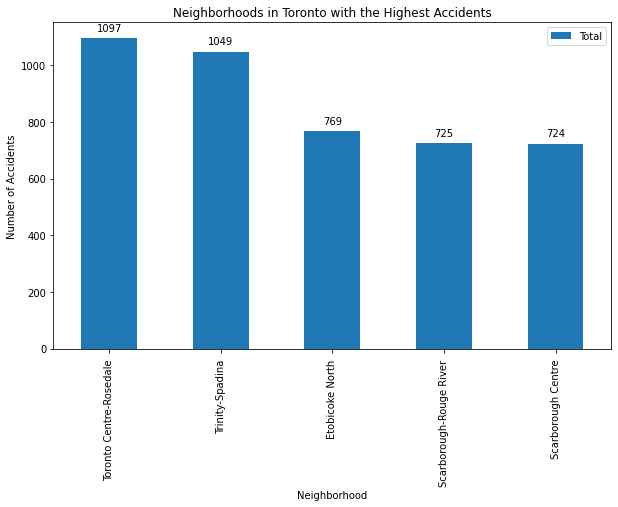

In [ ]:
per_neigh = acc_neigh_high[['Neighborhood','Total']]

per_neigh.set_index('Neighborhood',inplace = True)

ax = per_neigh.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Accidents')
ax.set_xlabel('Neighborhood')
ax.set_title('Neighborhoods in Toronto with the Highest Accidents')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 10,
               )
    
plt.xticks(rotation=90)

plt.show()

Accidents in Borough


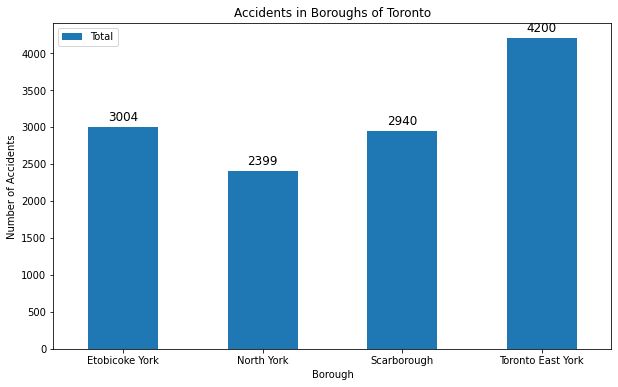

In [ ]:
per_borough = toronto_accident_borough[['Borough','Total']]

per_borough.set_index('Borough',inplace = True)

ax = per_borough.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Accidents')
ax.set_xlabel('Borough')
ax.set_title('Accidents in Boroughs of Toronto')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 12,
               )

plt.show()

 Based on exploratory data analysis it is clear that Toronto East York has the highest accidents.

#####Restricting the rows in the data frame to only those with Toronto East York as Borough

In [ ]:
tor_ny_neigh = toronto_acc

#vnc_ws_neigh.drop(['Type','Year', 'Month', 'Day', 'Hour'], axis = 1, inplace = True)
tor_ny_neigh = tor_ny_neigh[tor_ny_neigh['Borough'] == 'Toronto East York']
tor_ny_neigh.reset_index(inplace=True, drop=True)

print('Number of Neighborhoods in North York', len(tor_ny_neigh['Neighborhood'].unique()))

tor_ny_neigh['Neighborhood'].unique() 

Number of Neighborhoods in North York 12


array(['Toronto Centre-Rosedale ', 'Toronto-Danforth ',
       'Beaches-East York ', 'Trinity-Spadina ', 'Davenport ',
       "St. Paul's ", 'Parkdale-High Park ', 'Eglinton-Lawrence ',
       'Scarborough Southwest ', 'Don Valley West ', 'York South-Weston ',
       'York Centre '], dtype=object)

### Analysis using GeoCoder

In [ ]:
#Command to install OpenCage Geocoder for fetching Lat and Lng of Neighborhood
!pip install opencage

#Importing OpenCage Geocoder
from opencage.geocoder import OpenCageGeocode

     |████████████████████████████████| 54 kB 1.3 MB/s 
     |████████████████████████████████| 3.0 MB 6.9 MB/s 


#####Creating a new Data frame with Lat, Lng being fetched from OpenCage geocoder

In [ ]:
Latitude = []
Longitude = []
Borough = []
Neighborhood = tor_ny_neigh['Neighborhood'].unique()



key = '830323b5ca694362904814ff0a11b803'
geocoder = OpenCageGeocode(key)

for i in range(len(Neighborhood)):
    address = '{}, Toronto, ON, Canada'.format(Neighborhood[i])
    location = geocoder.geocode(address)
    Latitude.append(location[0]['geometry']['lat'])
    Longitude.append(location[0]['geometry']['lng'])
    Borough.append('Toronto East York')
print(Latitude, Longitude)

#print('The geograpical coordinate of Vancouver City are {}, {}.'.format(latitude, longitude))

[43.6683155, 43.6789439, 43.6814698, 43.6475646, 43.6715454, 43.693259, 43.6499649, 43.7192647, 43.7010356, 43.7275183, 43.6844658, 43.750241] [-79.3857947, -79.3448597, -79.3060214, -79.4138809, -79.4483222, -79.4038721, -79.473014, -79.429765, -79.2549582, -79.3818798, -79.4988181, -79.463352]


Dataframe of Neighborhoods with Toronto East York as Borough along with their co-ordinates

In [ ]:
ny_neig_dict = {'Neighborhood': Neighborhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
ny_neig_geo = pd.DataFrame(data=ny_neig_dict, columns=['Neighborhood', 'Borough', 'Latitude', 'Longitude'], index=None)

ny_neig_geo

,Neighborhood,Borough,Latitude,Longitude
0,Toronto Centre-Rosedale,Toronto East York,43.668315,-79.385795
1,Toronto-Danforth,Toronto East York,43.678944,-79.344860
2,Beaches-East York,Toronto East York,43.681470,-79.306021
3,Trinity-Spadina,Toronto East York,43.647565,-79.413881
4,Davenport,Toronto East York,43.671545,-79.448322
5,St. Paul's,Toronto East York,43.693259,-79.403872
6,Parkdale-High Park,Toronto East York,43.649965,-79.473014
7,Eglinton-Lawrence,Toronto East York,43.719265,-79.429765
8,Scarborough Southwest,Toronto East York,43.701036,-79.254958
9,Don Valley West,Toronto East York,43.727518,-79.381880


##### Installing Geocoder

In [ ]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

/bin/bash: conda: command not found


####Fetching the Geographical co-ordiantes of Toronto to plot on Map

In [ ]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


Folium

In [ ]:
import folium

####Using Folium to plot Vancouver City's West Side Borough and it's Neighborhoods

In [ ]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(ny_neig_geo['Latitude'], ny_neig_geo['Longitude'], ny_neig_geo['Borough'], ny_neig_geo['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Creating a new consolidated dataset of the Neighborhoods, boroughs, and the most common venues and the respective Neighbourhood along with co-ordinates.
#####This data will be fetched using Four Square API to explore the neighbourhood venues and to apply machine learning algorithm to cluster the neighbourhoods and present the findings by plotting it on maps using Folium.

####Setting Up Foursquare Credentials

In [ ]:
CLIENT_ID = 'G2JUY3BMRRTJA5GCAG35ZHZ3CA34HOFYVEBGRMUBK3XPQNUK' # your Foursquare ID
CLIENT_SECRET = 'CCSP1N0IEPDWSZ0DYRX3RWUERAZAZSOQOKBMCZC0LQ4WQMRU' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: G2JUY3BMRRTJA5GCAG35ZHZ3CA34HOFYVEBGRMUBK3XPQNUK
CLIENT_SECRET:CCSP1N0IEPDWSZ0DYRX3RWUERAZAZSOQOKBMCZC0LQ4WQMRU


####Defining a function to fetch top 10 venues around a given neighborhood

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
import requests # pip install requests

####Generating Venues

In [ ]:
toronto_ny_venues = getNearbyVenues(names=ny_neig_geo['Neighborhood'],
                                   latitudes=ny_neig_geo['Latitude'],
                                   longitudes=ny_neig_geo['Longitude']
                                  ) 

Toronto Centre-Rosedale 
Toronto-Danforth 
Beaches-East York 
Trinity-Spadina 
Davenport 
St. Paul's 
Parkdale-High Park 
Eglinton-Lawrence 
Scarborough Southwest 
Don Valley West 
York South-Weston 
York Centre 


####Data frame containing venues for each neighborhood in Toronto East York

In [ ]:
print(toronto_ny_venues.shape)
toronto_ny_venues.head()

(299, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Toronto Centre-Rosedale,43.668315,-79.385795,DanceLifeX Centre,43.666956,-79.385297,Dance Studio
1,Toronto Centre-Rosedale,43.668315,-79.385795,Toronto Hemp Company,43.668419,-79.385848,Smoke Shop
2,Toronto Centre-Rosedale,43.668315,-79.385795,Sansotei Ramen 三草亭,43.666735,-79.385353,Ramen Restaurant
3,Toronto Centre-Rosedale,43.668315,-79.385795,The Alley,43.665922,-79.385567,Bubble Tea Shop
4,Toronto Centre-Rosedale,43.668315,-79.385795,Sabai Sabai,43.670647,-79.384857,Thai Restaurant


####Venue Count per neighborhood

In [ ]:
toronto_ny_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Beaches-East York,4,4,4,4,4,4
Davenport,8,8,8,8,8,8
Don Valley West,7,7,7,7,7,7
Eglinton-Lawrence,13,13,13,13,13,13
Parkdale-High Park,34,34,34,34,34,34
Scarborough Southwest,8,8,8,8,8,8
St. Paul's,3,3,3,3,3,3
Toronto Centre-Rosedale,100,100,100,100,100,100
Toronto-Danforth,69,69,69,69,69,69


In [ ]:
print('There are {} uniques categories.'.format(len(toronto_ny_venues['Venue Category'].unique())))

There are 126 uniques categories.


###Modelling<a name="mdl"></a>

#####One Hot Encoding to Analyze Each Neighborhood

In [ ]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_ny_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_ny_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighborhood,Adult Boutique,Afghan Restaurant,American Restaurant,Art Gallery,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beer Bar,Beer Store,Bookstore,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Café,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,Comic Shop,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flower Shop,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gastropub,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health & Beauty Service,Hotel,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Korean Restaurant,Liquor Store,Lounge,Martial Arts School,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Music Venue,Nail Salon,New American Restaurant,Outdoor Supply Store,Paper / Office Supplies Store,Park,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Pub,Ramen Restaurant,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Soccer Field,Souvlaki Shop,Spa,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Toronto Centre-Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Toronto Centre-Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Toronto Centre-Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Toronto Centre-Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Toronto Centre-Rosedale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
toronto_onehot.shape

(299, 127)

In [ ]:
toronto_ny_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_ny_grouped

,Neighborhood,Adult Boutique,Afghan Restaurant,American Restaurant,Art Gallery,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beer Bar,Beer Store,Bookstore,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Café,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Quad,Comic Shop,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flower Shop,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gastropub,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health & Beauty Service,Hotel,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Korean Restaurant,Liquor Store,Lounge,Martial Arts School,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Music Venue,Nail Salon,New American Restaurant,Outdoor Supply Store,Paper / Office Supplies Store,Park,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Pub,Ramen Restaurant,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Soccer Field,Souvlaki Shop,Spa,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Beaches-East York,0.00,0.00,0.00000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000,0.000,0.00000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.250000,0.000000,0.000000,0.00,0.000,0.00,0.00000,0.00000,0.00,0.00,0.000000,0.00000,0.000000,0.000000,0.000,0.000000,0.00000,0.00,0.000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00,0.000,0.25,0.000000,0.000000,0.000000,0.00,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00000,0.000,0.000000,0.00000,0.000,0.00000,0.250000,0.00,0.000000,0.000000,0.250000,0.000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.00000,0.00
1,Davenport,0.00,0.00,0.00000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000,0.125,0.00000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.125000,0.000000,0.000000,0.00,0.125,0.00,0.00000,0.00000,0.00,0.00,0.000000,0.00000,0.000000,0.000000,0.125,0.000000,0.00000,0.00,0.000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00,0.000,0.00,0.000000,0.000000,0.000000,0.00,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00000,0.125,0.000000,0.00000,0.000,0.00000,0.125000,0.00,0.125000,0.000000,0.000000,0.125,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.00000,0.00
2,Don Valley West,0.00,0.00,0.00000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000,0.142857,0.000000,0.00000,0.00,0.000000,0.000000,0.142857,0.000,0.000,0.00000,0.142857,0.000000,0.000000,0.00,0.00,0.000000

In [ ]:
toronto_ny_grouped.shape

(12, 127)

####Top 5 most common venues across neighborhoods

In [ ]:
num_top_venues = 5

for hood in toronto_ny_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_ny_grouped[toronto_ny_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Beaches-East York ----
                  venue  freq
0           Pizza Place  0.25
1           Coffee Shop  0.25
2  Hungarian Restaurant  0.25
3                  Park  0.25
4            Nail Salon  0.00


----Davenport ----
         venue  freq
0   Playground  0.12
1     Bus Stop  0.12
2    Pet Store  0.12
3  Coffee Shop  0.12
4         Park  0.12


----Don Valley West ----
          venue  freq
0      Bus Line  0.14
1     Bookstore  0.14
2          Café  0.14
3  College Quad  0.14
4   College Gym  0.14


----Eglinton-Lawrence ----
              venue  freq
0         Pet Store  0.08
1              Café  0.08
2          Pharmacy  0.08
3       Supermarket  0.08
4  Sushi Restaurant  0.08


----Parkdale-High Park ----
         venue  freq
0  Coffee Shop  0.12
1       Bakery  0.09
2  Pizza Place  0.06
3         Café  0.06
4    Gastropub  0.03


----Scarborough Southwest ----
                 venue  freq
0                 Park  0.38
1                  Gym  0.12
2  American Restaurant  0.

####Creating the new dataframe and displaying the top 10 venues for each neighborhood.

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_ny_grouped['Neighborhood']

for ind in np.arange(toronto_ny_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_ny_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beaches-East York,Park,Pizza Place,Hungarian Restaurant,Coffee Shop,Comic Shop,Convenience Store,Cosmetics Shop,Cuban Restaurant,Donut Shop,Cupcake Shop
1,Davenport,Pet Store,Park,Coffee Shop,Convenience Store,Playground,Music Venue,Bus Stop,Dog Run,Flower Shop,Fast Food Restaurant
2,Don Valley West,Coffee Shop,Trail,College Gym,Café,Bus Line,Bookstore,College Quad,Frozen Yogurt Shop,Dog Run,Gift Shop
3,Eglinton-Lawrence,Supermarket,Sandwich Place,Coffee Shop,Middle Eastern Restaurant,Liquor Store,Pet Store,Pharmacy,Department Store,Bank,Breakfast Spot
4,Parkdale-High Park,Coffee Shop,Bakery,Pizza Place,Café,Gym,Pet Store,Pub,Italian Restaurant,Restaurant,Indian Restaurant


### Cluster Neighbourhoods

In [ ]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [ ]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_ny_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 0, 0, 0, 4, 2, 0, 0, 0], dtype=int32)

In [ ]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = ny_neig_geo

# merge toronto_grouped with Vancouver data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head()

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Toronto Centre-Rosedale,Toronto East York,43.668315,-79.385795,0,Café,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Restaurant,Italian Restaurant,Hotel,Dessert Shop,Gym,Salad Place
1,Toronto-Danforth,Toronto East York,43.678944,-79.344860,0,Greek Restaurant,Coffee Shop,Café,Sushi Restaurant,Pizza Place,Pub,Grocery Store,Bank,Bookstore,Italian Restaurant
2,Beaches-East York,Toronto East York,43.681470,-79.306021,3,Park,Pizza Place,Hungarian Restaurant,Coffee Shop,Comic Shop,Convenience Store,Cosmetics Shop,Cuban Restaurant,Donut Shop,Cupcake Shop
3,Trinity-Spadina,Toronto East York,43.647565,-79.413881,0,Cocktail Bar,Bakery,Bar,Vietnamese Restaurant,Café,Cupcake Shop,Korean Restaurant,Pizza Place,Pet Store,Park
4,Davenport,Toronto East York,43.671545,-79.448322,0,Pet Store,Park,Coffee Shop,Convenience Store,Playground,Music Venue,Bus Stop,Dog Run,Flower Shop,Fast Food Restaurant


In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

###Analysis<a name="analysis"></a>

####Examining the resulting Clusters

####Cluster 1

In [ ]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Toronto East York,Café,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Restaurant,Italian Restaurant,Hotel,Dessert Shop,Gym,Salad Place
1,Toronto East York,Greek Restaurant,Coffee Shop,Café,Sushi Restaurant,Pizza Place,Pub,Grocery Store,Bank,Bookstore,Italian Restaurant
3,Toronto East York,Cocktail Bar,Bakery,Bar,Vietnamese Restaurant,Café,Cupcake Shop,Korean Restaurant,Pizza Place,Pet Store,Park
4,Toronto East York,Pet Store,Park,Coffee Shop,Convenience Store,Playground,Music Venue,Bus Stop,Dog Run,Flower Shop,Fast Food Restaurant
6,Toronto East York,Coffee Shop,Bakery,Pizza Place,Café,Gym,Pet Store,Pub,Italian Restaurant,Restaurant,Indian Restaurant
7,Toronto East York,Supermarket,Sandwich Place,Coffee Shop,Middle Eastern Restaurant,Liquor Store,Pet Store,Pharmacy,Department Store,Bank,Breakfast Spot
9,Toronto East York,Coffee Shop,Trail,College Gym,Café,Bus Line,Bookstore,College Quad,Frozen Yogurt Shop,Dog Run,Gift Shop
11,Toronto East York,Metro Station,Bus Station,Furniture / Home Store,Outdoor Supply Store,Gym Pool,Escape Room,French Restaurant,Yoga Studio,Department Store,Diner


####Cluster 2

In [ ]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Toronto East York,Golf Course,Tennis Court,Cosmetics Shop,Park,Furniture / Home Store,Fruit & Vegetable Store,Comic Shop,Convenience Store,Gift Shop,Cuban Restaurant


####Cluster 3

In [ ]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Toronto East York,Skating Rink,Gym / Fitness Center,Trail,Deli / Bodega,Dog Run,Discount Store,Diner,Dessert Shop,Department Store,Yoga Studio


####Cluster 4

In [ ]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Toronto East York,Park,Pizza Place,Hungarian Restaurant,Coffee Shop,Comic Shop,Convenience Store,Cosmetics Shop,Cuban Restaurant,Donut Shop,Cupcake Shop


####Cluster 5

In [ ]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Toronto East York,Park,Gym,Hotel,Gym Pool,Pet Store,American Restaurant,Fruit & Vegetable Store,Dog Run,Comic Shop,Convenience Store


## Results and Discussion <a name="results"></a>

The objective of the business problem was to find that neighborhood where the traffic accidents are the most in Toronto, and an appropriate neighborhood within the borough to set up more norms and strictness and the installation of more CCTV cameras. This has been achieved by first making use of Toronto accident data to identify a borough. After selecting the borough it was imperative to choose the right neighborhoods by grouping them into clusters to assist the stakeholders by providing them with relavent data about venues and safety of a given neighborhood.

## Conclusion <a name="conclusion"></a>

We have explored the accident data to understand different types of accidents in all neighborhoods of Toronto and later categorized them into different boroughs, this helped us group the neighborhoods into boroughs and choose the most affected borough first. Once we confirmed the borough the number of neighborhoods for consideration also comes down, we further shortlist the neighborhoods based on the common venues, to choose a neighborhood which best suits the business problem.